<a href="https://colab.research.google.com/github/Malekkamoua/PFE/blob/main/2_Feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [19]:
org = pd.read_csv('/content/gdrive/MyDrive/Datascience/Datasets/full_dataset_after_ops.csv', decimal=',',parse_dates=["date"],infer_datetime_format=True, sep=',')

In [20]:
df = org

df.dropna(inplace = True)
df.drop('date', axis=1, inplace=True)

print(len(df))
df.head()

516511


,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,Purity
0,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,451.891,429.56,432.939,448.086,496.363,445.922,498.075,66.91,1.31,1
1,55.2,16.98,3043.46,568.054,399.668,10.068,1.74,249.741,247.874,250.313,...,451.24,468.927,434.61,449.688,484.411,447.826,458.567,66.91,1.31,1
2,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,...,452.441,458.165,442.865,446.21,471.411,437.69,427.669,66.91,1.31,1
3,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,...,452.441,452.9,450.523,453.67,462.598,443.682,425.679,66.91,1.31,1
4,55.2,16.98,3079.1,564.697,396.533,10.0705,1.74,250.73,248.906,249.521,...,444.384,443.269,460.449,439.92,451.588,433.539,425.458,66.91,1.31,1


## Feature selection with Filter methods: Variance threshold


In [ ]:
#A point beyond which there is a change in the manner a program executes

In [ ]:
# It removes all features which variance doesn’t meet some threshold.
# By default, it removes all zero-variance features, i.e., features that have the same value in all samples. 
# We assume that features with a higher variance may contain more useful information, but note that we are
# not taking the relationship between feature variables or feature and target variables into account, which 
# is one of the drawbacks of filter methods.

In [5]:
from sklearn.feature_selection import VarianceThreshold

df_variance_threshhold = df.drop(['% Silica Concentrate', 'Purity'], axis = 1)
df_variance_threshhold.head()

#why threshold = 0.5 ?
vt = VarianceThreshold(threshold=0.1)
vt.fit(df_variance_threshhold)

mask = vt.get_support()
variance_threshhold_chosen_features = list(df_variance_threshhold.loc[:, mask].columns)
removed_features = [feature for feature in df_variance_threshhold.columns if feature not in variance_threshhold_chosen_features]

print('Chosen features: {}'.format(variance_threshhold_chosen_features))
print('Removed features: {}'.format(removed_features))
print(variance_threshhold_chosen_features)

Chosen features: ['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow', 'Flotation Column 01 Level', 'Flotation Column 02 Level', 'Flotation Column 03 Level', 'Flotation Column 04 Level', 'Flotation Column 05 Level', 'Flotation Column 06 Level', 'Flotation Column 07 Level', '% Iron Concentrate']
Removed features: ['Ore Pulp Density']
['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow', 'Flotation Column 01 Level', 'Flotation Column 02 Level', 'Flotation Column 03 Leve

## Feature selection with Wrapper methods: XGBOOST Rfe



In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from matplotlib import pyplot
from xgboost import XGBRegressor

def feature_ranking_rfe(model, df):
 
  #number of features
  nof_list=np.arange(1,24)            
  high_score=0

  nof=0           
  score_list =[]

  X = df.drop(['% Silica Concentrate', 'Purity'], axis=1)
  y = df['% Silica Concentrate']

  for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # normalize the input values
    mms = MinMaxScaler()
    X_train = mms.fit_transform(X_train)
    X_test = mms.transform(X_test)

    rfe = RFE(estimator=model, n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score > high_score):
        high_score = score
        nof = nof_list[n]

  #calculating with the optimal number
  cols = list(X.columns)
  rfe = RFE(estimator=model, n_features_to_select=nof)
  X_rfe = rfe.fit_transform(X,y)  
  model.fit(X_rfe,y)              
  temp = pd.Series(rfe.support_,index = cols)
  selected_features_rfe = temp[temp==True].index

  features = { 'Model': model.__class__.__name__,
      'Number of features':  nof,
          'Highest feature score': high_score,
          'Selected features': [selected_features_rfe]}
  
  features = pd.DataFrame(features)
  ranking = pd.DataFrame(zip(X.columns, rfe.ranking_), columns=['Feature', 'Ranking']).sort_values('Ranking')

  if model.__class__.__name__ == 'LinearRegression':
    importance = model.coef_
  else:
    importance = model.feature_importances_  
    
  for feature, score in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (feature,score))
    
  pyplot.bar([x for x in range(len(importance))], importance)
  pyplot.show() 

  return features, ranking


Feature: 0, Score: 0.04901
Feature: 1, Score: 0.05245
Feature: 2, Score: 0.04717
Feature: 3, Score: 0.05864
Feature: 4, Score: 0.04624
Feature: 5, Score: 0.04571
Feature: 6, Score: 0.70078


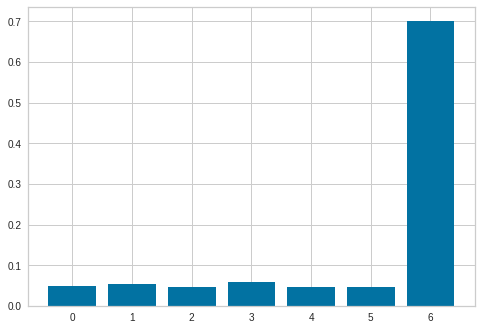

,Model,Number of features,Highest feature score,Selected features
0,XGBRegressor,7,0.709102,"Index(['% Silica Feed', 'Flotation Column 01 A..."


In [ ]:
model = XGBRegressor(objective ='reg:squarederror', 
                     tree_method = "hist",
                     verbosity = 0,  
                     n_jobs=-1)
 
xgbRegressor_rfe_features, ranking = feature_ranking_rfe(model,df)
xgbRegressor_rfe_features

In [ ]:
xgbRegressor_rfe_features['Selected features'].values

array([Index(['% Silica Feed', 'Flotation Column 01 Air Flow',
              'Flotation Column 04 Air Flow', 'Flotation Column 03 Level',
              'Flotation Column 06 Level', 'Flotation Column 07 Level',
              '% Iron Concentrate'],
             dtype='object')                                              ],
      dtype=object)

## Feature selection with Embedded methods: Lasso

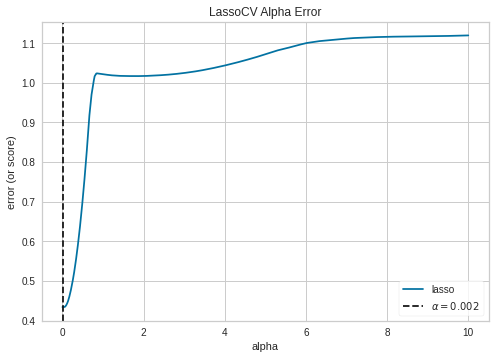

In [7]:
#https://www.scikit-yb.org/en/latest/api/regressor/alphas.html
import numpy as np

from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

X = df.drop(['% Silica Concentrate', 'Purity'], axis=1)
y = df['% Silica Concentrate']

# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 1000)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X, y)
visualizer.show()

In [8]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

X = df.drop(['% Silica Concentrate', 'Purity'], axis=1)
y = df['% Silica Concentrate']

# Lasso (l1) penalty.
# The selectFromModel class from sklearn, which  will select the features which coefficients are non-zero

selector = SelectFromModel(linear_model.Lasso(alpha=0.002))
selector.fit(X, y)

selected_feat = X.columns[(selector.get_support())]

print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print(
    'features with coefficients greater than the mean coefficient: {}'.format(
        np.sum(
            np.abs(selector.estimator_.coef_) > np.abs(
                selector.estimator_.coef_).mean())))

total features: 22
selected features: 20
features with coefficients greater than the mean coefficient: 2


In [ ]:
selected_feat

## Methods comparaison using KNN classifier

In [ ]:
variance_df = df[variance_threshhold_chosen_features]
variance_df[['% Silica Concentrate', 'Purity']] = df[[ '% Silica Concentrate', 'Purity' ]]


lasso_df = df[selected_feat]
lasso_df[['% Silica Concentrate', 'Purity']] = df[[ '% Silica Concentrate', 'Purity' ]]

XGB_df = df[['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
              'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
              'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
              'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
              'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
              'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
              'Flotation Column 02 Level', 'Flotation Column 03 Level',
              'Flotation Column 04 Level', 'Flotation Column 05 Level',
              'Flotation Column 06 Level', 'Flotation Column 07 Level',
              '% Iron Concentrate', '% Silica Concentrate', 'Purity']]

all_dfs = [df,variance_df, XGB_df, lasso_df]

In [23]:
data = {'Method/Model':  ['Filter: variance threshhold',
                          'Wrapper: XGBOOST',
                          'Embedded'],
        'Number of selected features': [len(variance_df.columns),
                              len(XGB_df.columns),
                              len(lasso_df.columns)],
        'Selected features': [variance_df.columns,
                              XGB_df.columns,
                              lasso_df.columns]
        }

feature_analysis = pd.DataFrame(data)

feature_analysis.to_csv( "/content/gdrive/MyDrive/Datascience/PFE/datasets/selected_features.csv", index=False, encoding='utf-8')
feature_analysis

,Method/Model,Number of selected features,Selected features
0,Filter: variance threshhold,23,"Index(['% Iron Feed', '% Silica Feed', 'Starch..."
1,Wrapper: XGBOOST,24,"Index(['% Iron Feed', '% Silica Feed', 'Starch..."
2,Embedded,22,"Index(['% Iron Feed', '% Silica Feed', 'Amina ..."


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

#initialisation
best_params = 0
model = 0
accuracy = 0
i = -1
max = {'dataset': i, 'accuracy': accuracy, 'best_params': best_params}

for df in all_dfs:
  i = i + 1
  X = df.drop(['Purity'], axis=1)
  y = df['Purity']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

  mms = MinMaxScaler()
  X_train = mms.fit_transform(X_train)
  X_test = mms.transform(X_test)

  grid_params = {
      'n_neighbors' : [3,5,11,19], # Always odd numbers to avaid ties
      'weights': ['uniform', 'distance'],
      'metric': ['euclidean', 'manhattan']
  }

  grid = GridSearchCV(
      KNeighborsClassifier(),
      grid_params,
      cv = 5,
      n_jobs = -1 #use all resources
  )

  grid_results = grid.fit(X_train, y_train)
  best_params = [grid_results.best_params_['metric'],grid_results.best_params_['n_neighbors'],grid_results.best_params_['weights']]

  #KNN with the best params
  model = KNeighborsClassifier(n_neighbors=best_params[1], 
                            weights=best_params[2], 
                            metric=best_params[0], 
                            n_jobs=-1)
  model.fit(X_train, y_train)
  y_test_hat=model.predict(X_test) 
  test_accuracy=accuracy_score(y_test,y_test_hat)*100
  if accuracy  < test_accuracy:
    accuracy = test_accuracy
    max = { 'dataset': i, 'accuracy': accuracy, 'best_params': best_params }
  print(i,test_accuracy)
  #ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);  
  y_pred = model.predict(X_test)

  print(classification_report(y_test,y_pred))
  print('_______________________________________________')

print(max)



**Create avaraged dataset from the best chosen one**

In [ ]:
#Compare chosen dataset accuracy VS avaraged dataset accruracy
chosen_dataset = all_dfs[list(max.values())[0]].copy()
chosen_dataset_avg = all_dfs[list(max.values())[0]].copy()

chosen_dataset_avg.insert(7,'Ave_Flot_Level',chosen_dataset_avg[[ 'Flotation Column 02 Level',
       'Flotation Column 03 Level']].mean(axis = 1))

chosen_dataset_avg.insert(6,'Ave_Flot_Air_Flow',chosen_dataset_avg[[ 'Flotation Column 01 Air Flow', 'Flotation Column 03 Air Flow',
       'Flotation Column 04 Air Flow']].mean(axis = 1))

chosen_dataset_avg.drop([ 'Flotation Column 01 Air Flow', 'Flotation Column 03 Air Flow',
       'Flotation Column 04 Air Flow', 'Flotation Column 02 Level',
       'Flotation Column 03 Level'
       ], axis = 1, inplace = True)

chosen_dataset_avg

,% Iron Feed,% Silica Feed,Amina Flow,Ave_Flot_Air_Flow,Ave_Flot_Level,% Iron Concentrate,% Silica Concentrate,Purity
0,55.20,16.98,578.910104,265.483316,448.797202,66.91,1.31,1
1,55.20,16.98,537.219661,265.003302,450.165289,67.06,1.11,1
2,55.20,16.98,591.906744,265.101226,450.885267,66.97,1.27,1
3,55.20,16.98,593.170106,265.141878,489.424658,66.75,1.36,1
4,55.20,16.98,619.710806,265.009100,549.721364,66.63,1.34,1
...,...,...,...,...,...,...,...,...
3417,49.75,23.20,498.785884,300.372681,453.530152,65.05,1.65,1
3418,49.75,23.20,510.780566,299.767060,445.420048,64.83,1.71,1
3419,49.75,23.20,519.289535,299.727563,479.991570,64.29,1.80,1
3420,49.75,23.20,493.451375,299.848006,662.678849,64.25,1.96,1


**Calculate new accuracy**

In [ ]:
best_params = list(max.values())[2]

X = chosen_dataset_avg.drop(['Purity'], axis=1)
y = chosen_dataset_avg['Purity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

#KNN with the best params
model = KNeighborsClassifier(n_neighbors=best_params[1], 
                            weights=best_params[2], 
                            metric=best_params[0], 
                            n_jobs=-1)
model.fit(X_train, y_train)
y_test_hat=model.predict(X_test) 
test_accuracy=accuracy_score(y_test,y_test_hat)*100
print(test_accuracy)

97.42990654205607


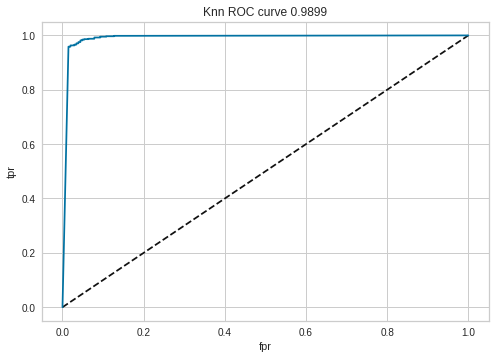

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score

y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn ROC curve %.4f' %(roc_auc_score(y_test,y_pred_proba)))
plt.show()

In [ ]:
chosen_dataset.insert(0,'date',org['date'])
chosen_dataset.to_csv('/content/gdrive/MyDrive/Datascience/PFE/datasets/chosen_dataset_xgboost.csv', index=False)

In [ ]:
chosen_dataset_avg.insert(0,'date',org['date'])
chosen_dataset_avg.to_csv('/content/gdrive/MyDrive/Datascience/PFE/datasets/chosen_dataset_avg_lasso.csv', index=False)